# rRNA analysis of GLDS-289
Goal is to determine is rRNA reads affect DEGs
Run in R kernel

In [1]:
library(DESeq2)

Warning message:
“package ‘DESeq2’ was built under R version 4.0.3”
Loading required package: S4Vectors

Warning message:
“package ‘S4Vectors’ was built under R version 4.0.3”
Loading required package: stats4

Loading required package: BiocGenerics

Warning message:
“package ‘BiocGenerics’ was built under R version 4.0.5”
Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, past

## Analysis of full GLDS-289 study (MHU-1 and MHU-2)

In [2]:
system("wget -O counts_no_rRNA.csv \'https://github.com/jgalazka/GLDS-289/blob/main/counts_no_rRNA.csv?raw=true\'")

In [3]:
system("wget -O counts.csv \'https://github.com/jgalazka/GLDS-289/blob/main/counts.csv?raw=true\'")

In [4]:
cts <- round(as.matrix(read.csv("counts.csv",sep=",",row.names="gene_id",check.names=FALSE)))
head(cts)

,Mmus_C57-6J_TMS_MHU1_FLT_1G_Rep1,Mmus_C57-6J_TMS_MHU1_FLT_1G_Rep2,Mmus_C57-6J_TMS_MHU1_FLT_1G_Rep3,Mmus_C57-6J_TMS_MHU1_FLT_uG_Rep1,Mmus_C57-6J_TMS_MHU1_FLT_uG_Rep2,Mmus_C57-6J_TMS_MHU1_FLT_uG_Rep3,Mmus_C57-6CR_TMS_MHU1_GC_1G_Rep1,Mmus_C57-6CR_TMS_MHU1_GC_1G_Rep2,Mmus_C57-6CR_TMS_MHU1_GC_1G_Rep3,Mmus_C57-6J_TMS_MHU2_FLT_1G_Rep1,Mmus_C57-6J_TMS_MHU2_FLT_1G_Rep2,Mmus_C57-6J_TMS_MHU2_FLT_1G_Rep3,Mmus_C57-6J_TMS_MHU2_FLT_uG_Rep1,Mmus_C57-6J_TMS_MHU2_FLT_uG_Rep2,Mmus_C57-6J_TMS_MHU2_FLT_uG_Rep3,Mmus_C57-6J_TMS_MHU2_GC_1G_Rep1,Mmus_C57-6J_TMS_MHU2_GC_1G_Rep2,Mmus_C57-6J_TMS_MHU2_GC_1G_Rep3
ENSMUSG00000000001,601,529,666,564,435,453,531,633,733,1078,1065,1103,1286,1086,1194,1075,1084,1115
ENSMUSG00000000003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000000028,136,123,151,72,85,76,140,121,177,66,58,70,185,181,191,266,210,231
ENSMUSG00000000031,10,11,13,8,6,7,17,20,20,20,14,23,26,22,42,34,20,33
ENSMUSG00000000037,12,11,13,8,11,4,7,20,15,15,6,9,27,21,24,19,22,20
ENSMUSG00000000049,0,0,7,0,1,2,2,2,0,1,7,3,7,4,8,3,2,4


In [5]:
system("wget -O GLDS-289_study_simple2.csv \'https://github.com/jgalazka/GLDS-289/raw/main/GLDS-289_study_simple2.csv\'")

In [6]:
coldata <- read.csv('GLDS-289_study_simple2.csv', row.names=1)
coldata$Space <- factor(coldata$Space)
coldata$Gravity <- factor(coldata$Gravity)
coldata$Study <- factor(coldata$Study)
head(coldata)

,Study,Space,Gravity
,<fct>,<fct>,<fct>
Mmus_C57-6J_TMS_MHU1_FLT_1G_Rep1,MHU-1,Space,1G
Mmus_C57-6J_TMS_MHU1_FLT_1G_Rep2,MHU-1,Space,1G
Mmus_C57-6J_TMS_MHU1_FLT_1G_Rep3,MHU-1,Space,1G
Mmus_C57-6J_TMS_MHU1_FLT_uG_Rep1,MHU-1,Space,uG
Mmus_C57-6J_TMS_MHU1_FLT_uG_Rep2,MHU-1,Space,uG
Mmus_C57-6J_TMS_MHU1_FLT_uG_Rep3,MHU-1,Space,uG


In [7]:
all(rownames(coldata) %in% colnames(cts))

[1] TRUE

In [8]:
all(rownames(coldata) == colnames(cts))

[1] TRUE

In [9]:
dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = coldata,
                              design = ~ Space)
dds

converting counts to integer mode



class: DESeqDataSet 
dim: 55536 18 
metadata(1): version
assays(1): counts
rownames(55536): ENSMUSG00000000001 ENSMUSG00000000003 ...
  ENSMUSG00000118392 ENSMUSG00000118393
rowData names(0):
colnames(18): Mmus_C57-6J_TMS_MHU1_FLT_1G_Rep1
  Mmus_C57-6J_TMS_MHU1_FLT_1G_Rep2 ... Mmus_C57-6J_TMS_MHU2_GC_1G_Rep2
  Mmus_C57-6J_TMS_MHU2_GC_1G_Rep3
colData names(3): Study Space Gravity

In [10]:
keep <- rowSums(counts(dds)) > 0
dds <- dds[keep,]

In [11]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 26 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [12]:
vsd <- vst(dds, blind=FALSE)

In [13]:
sampleDists <- dist(t(assay(vsd)))

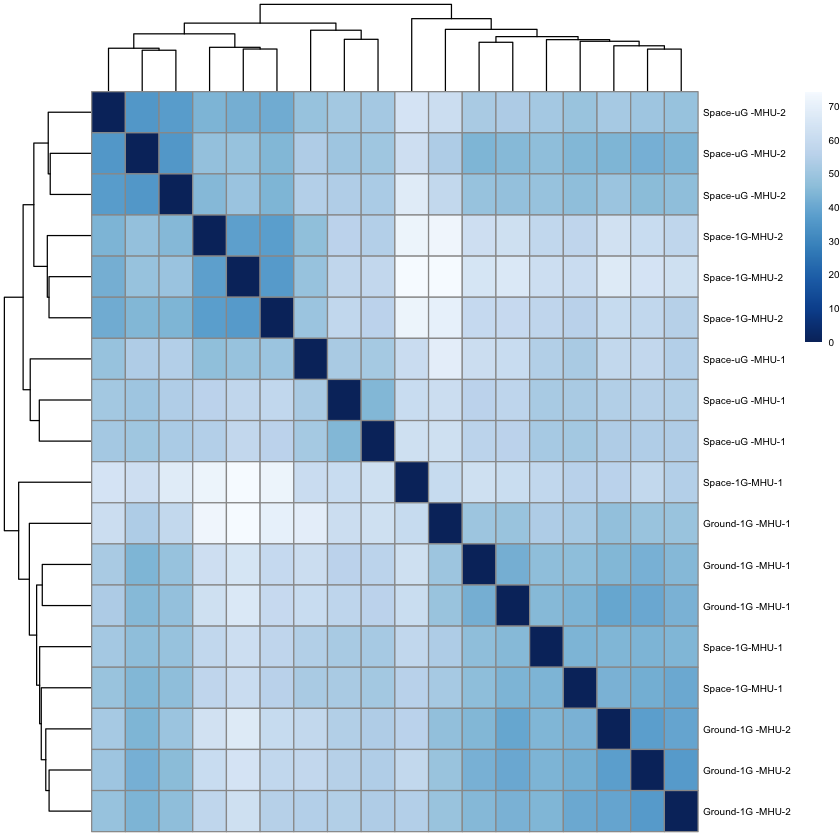

In [14]:
library("pheatmap")
library("RColorBrewer")
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(vsd$Space, vsd$Gravity, vsd$Study, sep="-")
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors,fontsize = 6)

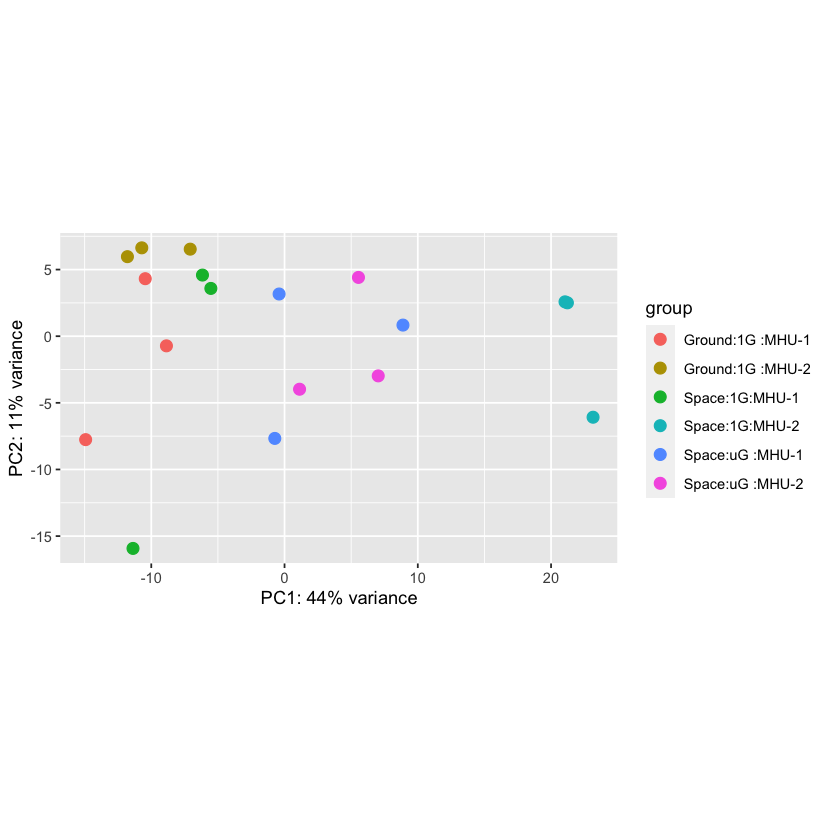

In [15]:
plotPCA(vsd, intgroup=c("Space","Gravity","Study"))

In [16]:
ctsnorRNA <- round(as.matrix(read.csv("counts_no_rRNA.csv",sep=",",row.names="gene_id",check.names=FALSE)))
head(ctsnorRNA)

,Mmus_C57-6J_TMS_MHU1_FLT_1G_Rep1,Mmus_C57-6J_TMS_MHU1_FLT_1G_Rep2,Mmus_C57-6J_TMS_MHU1_FLT_1G_Rep3,Mmus_C57-6J_TMS_MHU1_FLT_uG_Rep1,Mmus_C57-6J_TMS_MHU1_FLT_uG_Rep2,Mmus_C57-6J_TMS_MHU1_FLT_uG_Rep3,Mmus_C57-6CR_TMS_MHU1_GC_1G_Rep1,Mmus_C57-6CR_TMS_MHU1_GC_1G_Rep2,Mmus_C57-6CR_TMS_MHU1_GC_1G_Rep3,Mmus_C57-6J_TMS_MHU2_FLT_1G_Rep1,Mmus_C57-6J_TMS_MHU2_FLT_1G_Rep2,Mmus_C57-6J_TMS_MHU2_FLT_1G_Rep3,Mmus_C57-6J_TMS_MHU2_FLT_uG_Rep1,Mmus_C57-6J_TMS_MHU2_FLT_uG_Rep2,Mmus_C57-6J_TMS_MHU2_FLT_uG_Rep3,Mmus_C57-6J_TMS_MHU2_GC_1G_Rep1,Mmus_C57-6J_TMS_MHU2_GC_1G_Rep2,Mmus_C57-6J_TMS_MHU2_GC_1G_Rep3
ENSMUSG00000000001,601,529,666,564,435,453,531,633,733,1078,1065,1103,1286,1086,1194,1075,1084,1115
ENSMUSG00000000003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000000028,136,123,151,72,85,76,140,121,177,66,58,70,185,181,191,266,210,231
ENSMUSG00000000031,10,11,13,8,6,7,17,20,20,20,14,23,26,22,42,34,20,33
ENSMUSG00000000037,12,11,13,8,11,4,7,20,15,15,6,9,27,21,24,19,22,20
ENSMUSG00000000049,0,0,7,0,1,2,2,2,0,1,7,3,7,4,8,3,2,4


In [17]:
ddsnorRNA <- DESeqDataSetFromMatrix(countData = cts,
                              colData = coldata,
                              design = ~ Space)
ddsnorRNA

converting counts to integer mode



class: DESeqDataSet 
dim: 55536 18 
metadata(1): version
assays(1): counts
rownames(55536): ENSMUSG00000000001 ENSMUSG00000000003 ...
  ENSMUSG00000118392 ENSMUSG00000118393
rowData names(0):
colnames(18): Mmus_C57-6J_TMS_MHU1_FLT_1G_Rep1
  Mmus_C57-6J_TMS_MHU1_FLT_1G_Rep2 ... Mmus_C57-6J_TMS_MHU2_GC_1G_Rep2
  Mmus_C57-6J_TMS_MHU2_GC_1G_Rep3
colData names(3): Study Space Gravity

In [18]:
keep <- rowSums(counts(ddsnorRNA)) > 0
ddsnorRNA <- ddsnorRNA[keep,]

In [19]:
ddsnorRNA <- DESeq(ddsnorRNA)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 26 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [20]:
vsdnorRNA <- vst(ddsnorRNA, blind=FALSE)

In [21]:
sampleDistsnorRNA <- dist(t(assay(vsdnorRNA)))

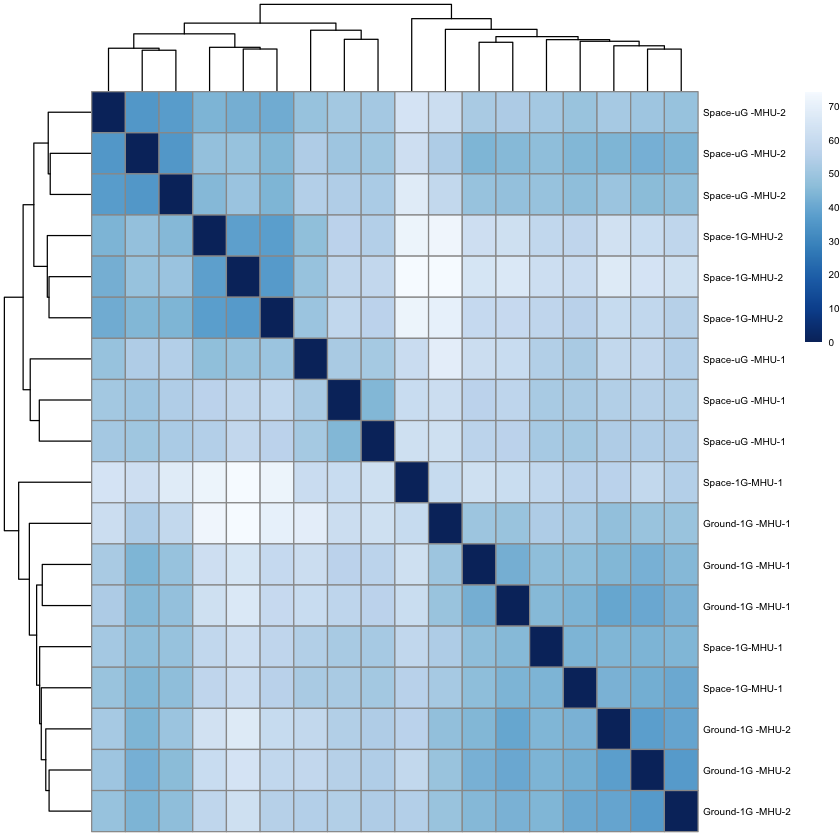

In [22]:
library("pheatmap")
library("RColorBrewer")
sampleDistMatrix <- as.matrix(sampleDistsnorRNA)
rownames(sampleDistMatrix) <- paste(vsdnorRNA$Space, vsdnorRNA$Gravity, vsdnorRNA$Study,sep="-")
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDistsnorRNA,
         clustering_distance_cols=sampleDistsnorRNA,
         col=colors,fontsize = 6)

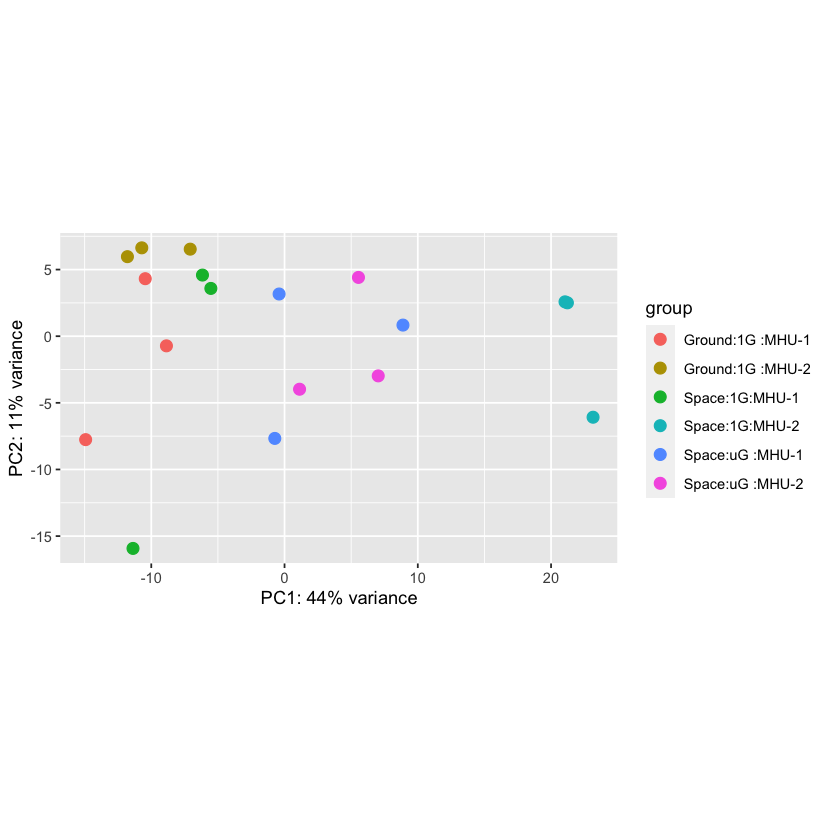

In [23]:
plotPCA(vsdnorRNA, intgroup=c("Space","Gravity","Study"))

In [24]:
normcounts = counts(dds, normalized=T)
normcounts_norRNA = counts(ddsnorRNA, normalized=T)

In [25]:
write.csv(normcounts, 'normcounts.csv')

In [26]:
write.csv(normcounts_norRNA, 'normcounts_norRNA.csv')

# MHU-2
Based on clustering above, just analyze MHU-2.

In [27]:
system("wget -O GLDS-289_study_simple2_MHU-2.csv \'https://github.com/jgalazka/GLDS-289/raw/main/GLDS-289_study_simple2_MHU-2.csv?raw=true\'")

In [28]:
coldata <- read.csv('GLDS-289_study_simple2_MHU-2.csv', row.names=1)
coldata$Space <- factor(coldata$Space)
coldata$Gravity <- factor(coldata$Gravity)
coldata$SpaceGravity <- factor(coldata$SpaceGravity)
head(coldata)

,Space,Gravity,SpaceGravity
,<fct>,<fct>,<fct>
Mmus_C57-6J_TMS_MHU2_FLT_1G_Rep1,Space,1G,Space1G
Mmus_C57-6J_TMS_MHU2_FLT_1G_Rep2,Space,1G,Space1G
Mmus_C57-6J_TMS_MHU2_FLT_1G_Rep3,Space,1G,Space1G
Mmus_C57-6J_TMS_MHU2_FLT_uG_Rep1,Space,uG,SpaceuG
Mmus_C57-6J_TMS_MHU2_FLT_uG_Rep2,Space,uG,SpaceuG
Mmus_C57-6J_TMS_MHU2_FLT_uG_Rep3,Space,uG,SpaceuG


In [29]:
system("wget -O counts_mhu2.csv \'https://github.com/jgalazka/GLDS-289/blob/main/counts_mhu2.csv?raw=true\'")

In [30]:
mhu2cts <- round(as.matrix(read.csv("counts_mhu2.csv",sep=",",row.names="gene_id",check.names=FALSE)))
head(mhu2cts)

,Mmus_C57-6J_TMS_MHU2_FLT_1G_Rep1,Mmus_C57-6J_TMS_MHU2_FLT_1G_Rep2,Mmus_C57-6J_TMS_MHU2_FLT_1G_Rep3,Mmus_C57-6J_TMS_MHU2_FLT_uG_Rep1,Mmus_C57-6J_TMS_MHU2_FLT_uG_Rep2,Mmus_C57-6J_TMS_MHU2_FLT_uG_Rep3,Mmus_C57-6J_TMS_MHU2_GC_1G_Rep1,Mmus_C57-6J_TMS_MHU2_GC_1G_Rep2,Mmus_C57-6J_TMS_MHU2_GC_1G_Rep3
ENSMUSG00000000001,1078,1065,1103,1286,1086,1194,1075,1084,1115
ENSMUSG00000000003,0,0,0,0,0,0,0,0,0
ENSMUSG00000000028,66,58,70,185,181,191,266,210,231
ENSMUSG00000000031,20,14,23,26,22,42,34,20,33
ENSMUSG00000000037,15,6,9,27,21,24,19,22,20
ENSMUSG00000000049,1,7,3,7,4,8,3,2,4


In [31]:
system("wget -O counts_no_rRNA_mhu2.csv \'https://github.com/jgalazka/GLDS-289/blob/main/counts_no_rRNA_mhu2.csv?raw=true\'")

In [32]:
mhu2ctsnoRNA <- round(as.matrix(read.csv("counts_no_rRNA_mhu2.csv",sep=",",row.names="gene_id",check.names=FALSE)))
head(mhu2ctsnoRNA)

,Mmus_C57-6J_TMS_MHU2_FLT_1G_Rep1,Mmus_C57-6J_TMS_MHU2_FLT_1G_Rep2,Mmus_C57-6J_TMS_MHU2_FLT_1G_Rep3,Mmus_C57-6J_TMS_MHU2_FLT_uG_Rep1,Mmus_C57-6J_TMS_MHU2_FLT_uG_Rep2,Mmus_C57-6J_TMS_MHU2_FLT_uG_Rep3,Mmus_C57-6J_TMS_MHU2_GC_1G_Rep1,Mmus_C57-6J_TMS_MHU2_GC_1G_Rep2,Mmus_C57-6J_TMS_MHU2_GC_1G_Rep3
ENSMUSG00000000001,1078,1065,1103,1286,1086,1194,1075,1084,1115
ENSMUSG00000000003,0,0,0,0,0,0,0,0,0
ENSMUSG00000000028,66,58,70,185,181,191,266,210,231
ENSMUSG00000000031,20,14,23,26,22,42,34,20,33
ENSMUSG00000000037,15,6,9,27,21,24,19,22,20
ENSMUSG00000000049,1,7,3,7,4,8,3,2,4


In [33]:
ddsnorRNAmhu2 <- DESeqDataSetFromMatrix(countData = mhu2ctsnoRNA,
                              colData = coldata,
                              design = ~ SpaceGravity)
ddsnorRNAmhu2

converting counts to integer mode



class: DESeqDataSet 
dim: 55182 9 
metadata(1): version
assays(1): counts
rownames(55182): ENSMUSG00000000001 ENSMUSG00000000003 ...
  ENSMUSG00000118392 ENSMUSG00000118393
rowData names(0):
colnames(9): Mmus_C57-6J_TMS_MHU2_FLT_1G_Rep1
  Mmus_C57-6J_TMS_MHU2_FLT_1G_Rep2 ... Mmus_C57-6J_TMS_MHU2_GC_1G_Rep2
  Mmus_C57-6J_TMS_MHU2_GC_1G_Rep3
colData names(3): Space Gravity SpaceGravity

In [34]:
ddsmhu2 <- DESeqDataSetFromMatrix(countData = mhu2cts,
                              colData = coldata,
                              design = ~ SpaceGravity)
ddsmhu2

converting counts to integer mode



class: DESeqDataSet 
dim: 55536 9 
metadata(1): version
assays(1): counts
rownames(55536): ENSMUSG00000000001 ENSMUSG00000000003 ...
  ENSMUSG00000118392 ENSMUSG00000118393
rowData names(0):
colnames(9): Mmus_C57-6J_TMS_MHU2_FLT_1G_Rep1
  Mmus_C57-6J_TMS_MHU2_FLT_1G_Rep2 ... Mmus_C57-6J_TMS_MHU2_GC_1G_Rep2
  Mmus_C57-6J_TMS_MHU2_GC_1G_Rep3
colData names(3): Space Gravity SpaceGravity

In [35]:
keep <- rowSums(counts(ddsmhu2)) > 0
ddsmhu2 <- ddsmhu2[keep,]

In [36]:
keep <- rowSums(counts(ddsnorRNAmhu2)) > 0
ddsnorRNAmhu2 <- ddsnorRNAmhu2[keep,]

In [37]:
ddsnorRNAmhu2 <- DESeq(ddsnorRNAmhu2)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [38]:
ddsmhu2 <- DESeq(ddsmhu2)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



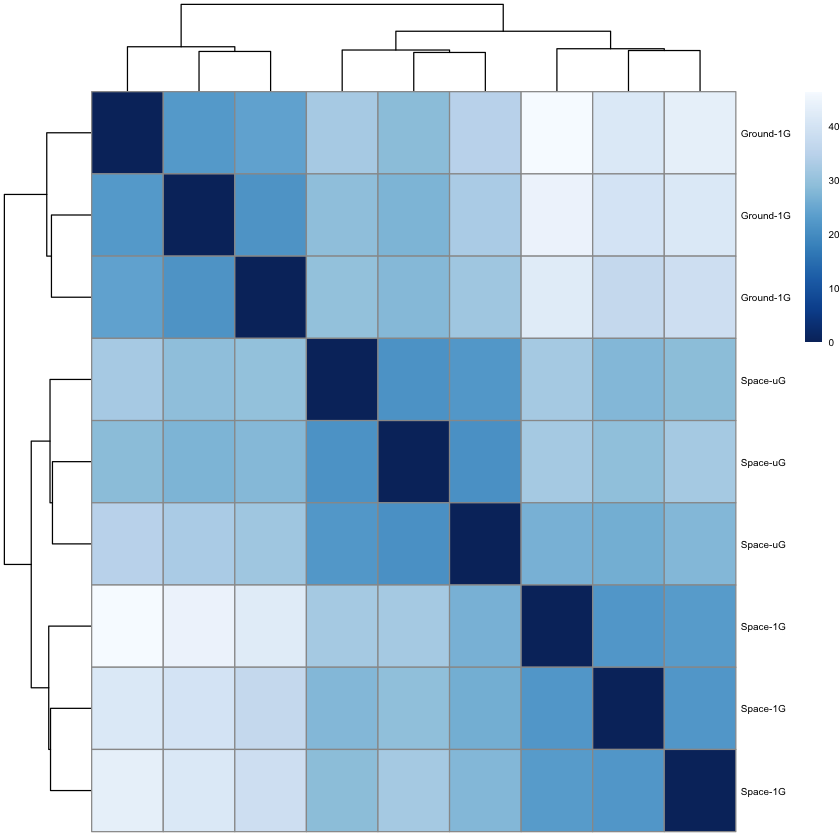

In [39]:
vsdnorRNAmhu2 <- vst(ddsnorRNAmhu2, blind=FALSE)
sampleDistsnorRNAmhu2 <- dist(t(assay(vsdnorRNAmhu2)))

library("pheatmap")
library("RColorBrewer")
sampleDistMatrix <- as.matrix(sampleDistsnorRNAmhu2)
rownames(sampleDistMatrix) <- paste(vsdnorRNAmhu2$Space, vsdnorRNAmhu2$Gravity, sep="-")
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDistsnorRNAmhu2,
         clustering_distance_cols=sampleDistsnorRNAmhu2,
         col=colors,fontsize = 6)

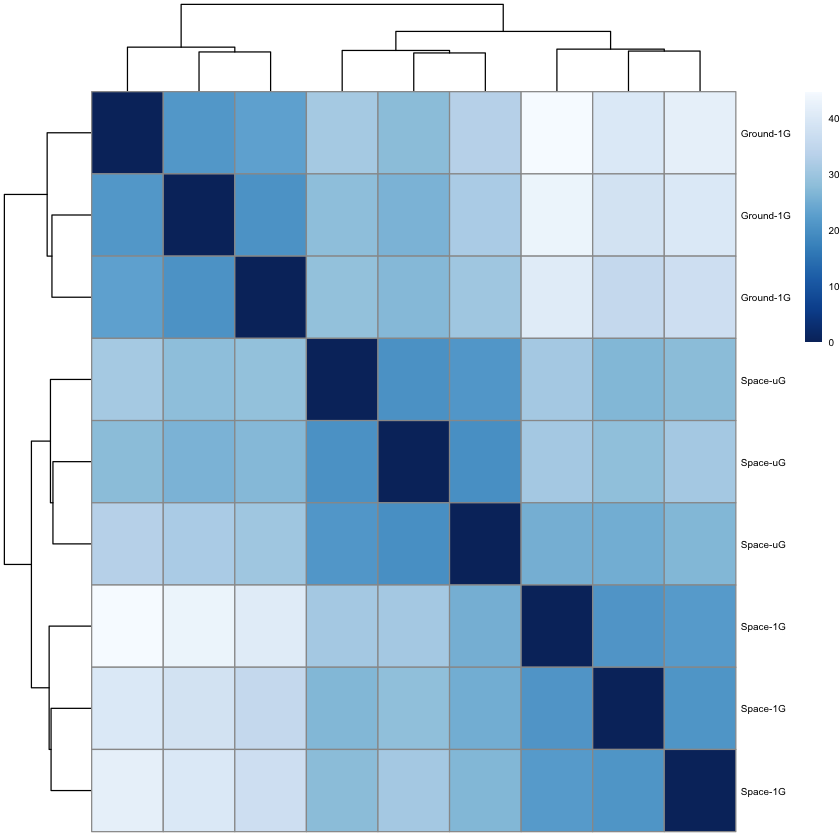

In [40]:
vsdmhu2 <- vst(ddsmhu2, blind=FALSE)
sampleDistsmhu2 <- dist(t(assay(vsdmhu2)))

library("pheatmap")
library("RColorBrewer")
sampleDistMatrix <- as.matrix(sampleDistsmhu2)
rownames(sampleDistMatrix) <- paste(vsdmhu2$Space, vsdmhu2$Gravity, sep="-")
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDistsmhu2,
         clustering_distance_cols=sampleDistsmhu2,
         col=colors,fontsize = 6)

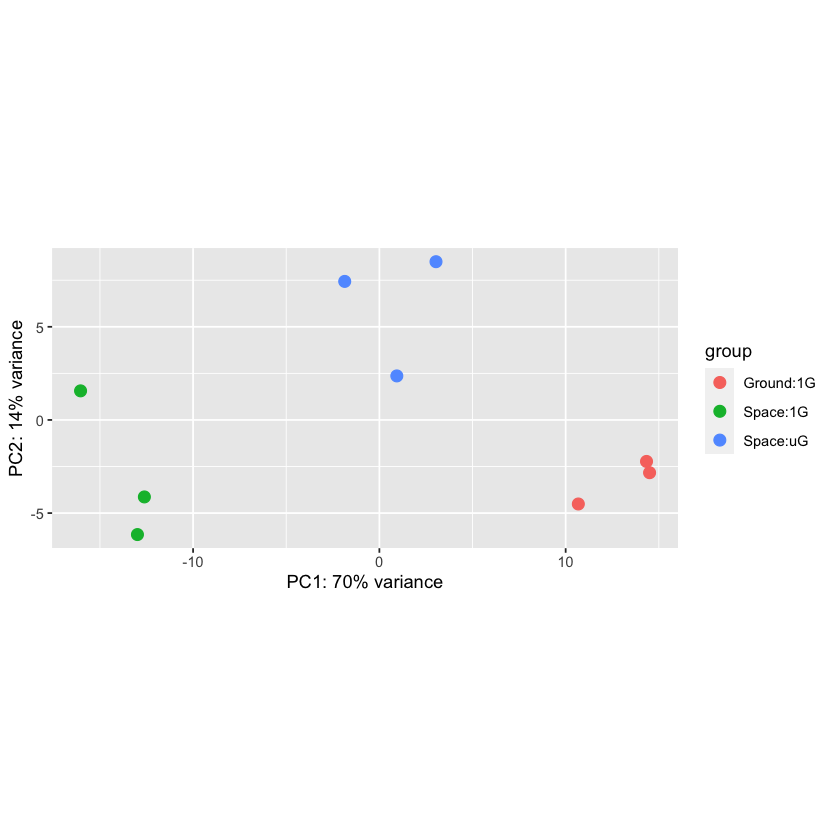

In [41]:
plotPCA(vsdnorRNAmhu2, intgroup=c("Space","Gravity"))

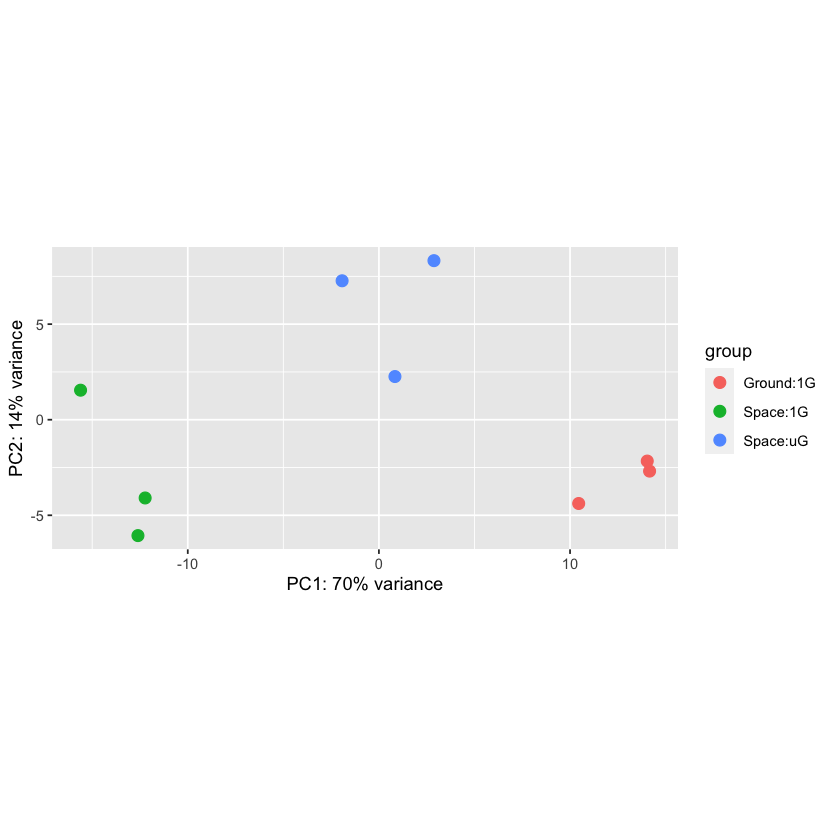

In [42]:
plotPCA(vsdmhu2, intgroup=c("Space","Gravity"))

In [43]:
#Compare MHU-2 Space uG to Space 1G
#A contrast is a linear combination of estimated log2 fold changes, which can be used
#to test if differences between groups are equal to zero. The simplest use case for contrasts
#is an experimental design containing a factor with three levels, say A, B and C.
#Contrasts enable the user to generate results for all 3 possible differences:
#log2 fold change of B vs A, of C vs A, and of C vs B.
#The contrast argument of results function is used to extract test results of log2 fold
#changes of interest.
resSpaceuGoverSpace1G = results(ddsmhu2, contrast=c("SpaceGravity","SpaceuG","Space1G"))
resSpaceuGoverSpace1GnorRNA = results(ddsnorRNAmhu2, contrast=c("SpaceGravity","SpaceuG","Space1G"))

In [44]:
summary(resSpaceuGoverSpace1G)


out of 30662 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 876, 2.9%
LFC < 0 (down)     : 291, 0.95%
outliers [1]       : 16, 0.052%
low counts [2]     : 16043, 52%
(mean count < 14)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [45]:
summary(resSpaceuGoverSpace1GnorRNA)


out of 30653 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 879, 2.9%
LFC < 0 (down)     : 300, 0.98%
outliers [1]       : 16, 0.052%
low counts [2]     : 16630, 54%
(mean count < 18)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



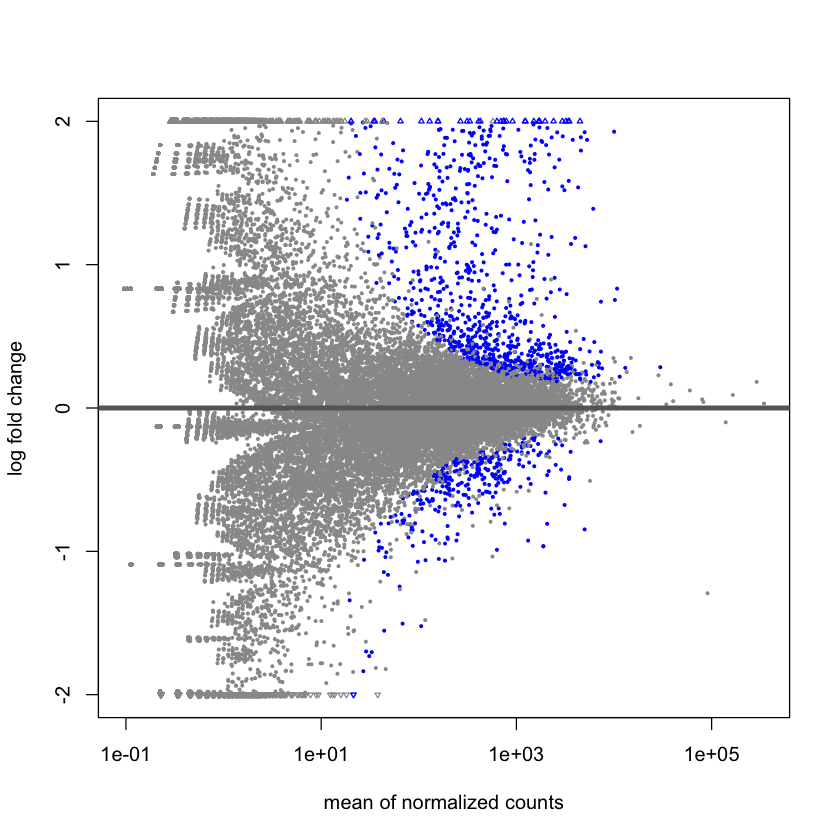

In [46]:
plotMA(resSpaceuGoverSpace1GnorRNA, ylim=c(-2,2))

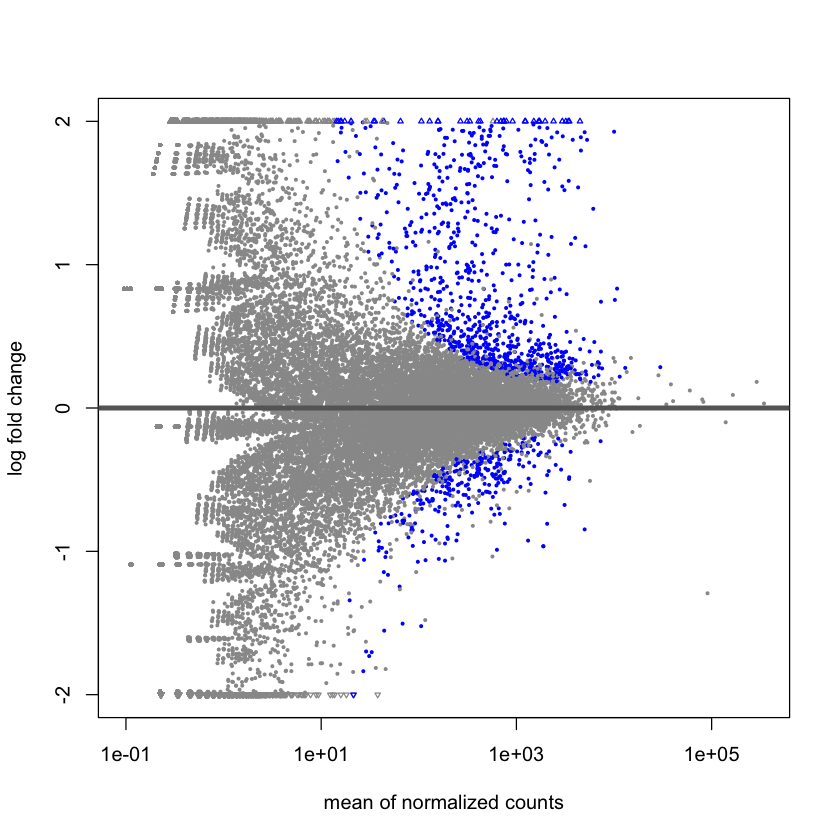

In [47]:
plotMA(resSpaceuGoverSpace1G, ylim=c(-2,2))

In [48]:
write.csv(resSpaceuGoverSpace1G, "Space_uG_over_Space_1G_rRNA.csv")

In [49]:
write.csv(resSpaceuGoverSpace1GnorRNA, "Space_uG_over_Space_1G_no_rRNA.csv")

In [50]:
resSpaceuGoverSpace1GLFC1 = results(ddsmhu2, lfcThreshold=0.1, contrast=c("SpaceGravity","SpaceuG","Space1G"))
resSpaceuGoverSpace1GnorRNALFC1 = results(ddsnorRNAmhu2, lfcThreshold=0.1, contrast=c("SpaceGravity","SpaceuG","Space1G"))

In [51]:
summary(resSpaceuGoverSpace1GLFC1)


out of 30662 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.10 (up)    : 529, 1.7%
LFC < -0.10 (down) : 97, 0.32%
outliers [1]       : 16, 0.052%
low counts [2]     : 14860, 48%
(mean count < 9)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [52]:
summary(resSpaceuGoverSpace1GnorRNALFC1)


out of 30653 with nonzero total read count
adjusted p-value < 0.1
LFC > 0.10 (up)    : 529, 1.7%
LFC < -0.10 (down) : 97, 0.32%
outliers [1]       : 16, 0.052%
low counts [2]     : 14855, 48%
(mean count < 9)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [53]:
write.csv(resSpaceuGoverSpace1GLFC1, "Space_uG_over_Space_1G_rRNA_LFC1.csv")
write.csv(resSpaceuGoverSpace1GnorRNALFC1, "Space_uG_over_Space_1G_no_rRNA_LFC1.csv")

In [54]:
resSpaceuGoverSpace1GADJP5 =
results(ddsmhu2, alpha=0.05, contrast=c("SpaceGravity","SpaceuG","Space1G"))
resSpaceuGoverSpace1GnorRNAADJP5 =
results(ddsnorRNAmhu2, alpha=0.05, contrast=c("SpaceGravity","SpaceuG","Space1G"))

In [55]:
summary(resSpaceuGoverSpace1GADJP5)


out of 30662 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 723, 2.4%
LFC < 0 (down)     : 210, 0.68%
outliers [1]       : 16, 0.052%
low counts [2]     : 16043, 52%
(mean count < 14)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [56]:
summary(resSpaceuGoverSpace1GnorRNAADJP5)


out of 30653 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 724, 2.4%
LFC < 0 (down)     : 210, 0.69%
outliers [1]       : 16, 0.052%
low counts [2]     : 16038, 52%
(mean count < 14)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [57]:
write.csv(resSpaceuGoverSpace1GLFC1, "Space_uG_over_Space_1G_rRNA_ADJP5.csv")
write.csv(resSpaceuGoverSpace1GnorRNALFC1, "Space_uG_over_Space_1G_no_rRNA_ADJP5.csv")